In [2]:
from random import randrange

# Choose the security parameter
sec_param = 12

# Generate two random numbers of bit length lambda
n = randrange(2**(sec_param-1), 2**sec_param - 1)
m = randrange(2**(sec_param-1), 2**sec_param - 1)

print("n =", n, "\nm =", m)

# Define algorithm A, which adds the two numbers
def algorithm_a(n, m):
    return n + m

# Measure the time it takes to run algorithm A
result_a = algorithm_a(n, m)

print("Result of algorithm A:", result_a)

# Define algorithm B, which tries to factor a number
def algorithm_b(n):
    factors = []
    for i in range(1, n + 1):
        if n % i == 0:
            factors.append(i)
    return factors

# Measure the time it takes to run algorithm B
result_b = algorithm_b(n)

print("Factors of n:", result_b)


n = 3757 
m = 2211
Result of algorithm A: 5968
Factors of n: [1, 13, 17, 221, 289, 3757]


## Catalan Alphabet combinations to know the Security Level


In [5]:
import math
# Define the size of the Catalan alphabet and the length of the password
n = 27
L = 20

# Calculate the number of possible combinations
C = n ** L

# Print the result
print("Number of possible combinations:", C)
# Calculate the security level in bits
S = math.log2(C)

# Print the result
print("Security level in bits:", S)


Number of possible combinations: 42391158275216203514294433201
Security level in bits: 95.09775004326937


### The same but adding capital letters

In [7]:
# Define the size of the Catalan alphabet (including both lowercase and uppercase letters)
n = 54
L = 20

# Calculate the number of possible combinations
C = n ** L

# Print the result
print("Number of possible combinations:", C)
S = math.log2(C)

# Print the result
print("Security level in bits:", S)

Number of possible combinations: 44450351179593105816204799588171776
Security level in bits: 115.09775004326937


## Now if our password is a Catalan word that appears in the dicctionary, what is the security level?

In [9]:
# Number of words in the Catalan dictionary
C = 88500

# Calculate the security level in bits
S = math.log2(C)

# Print the result
print("Number of possible combinations:", C)
print("Security level in bits:", S)


Number of possible combinations: 88500
Security level in bits: 16.433389834745086


# One time pad implementation sending a message

In [17]:
import random

# Set a security parameter
sec_param = 96

# Define the XOR operation:
def xor(a, b):
    return int(a) ^ int(b)  # Using bitwise XOR operation

### KEY GENERATION
# Generate a random key of length sec_param
k = [random.randint(0, 1) for _ in range(sec_param)]

### ENCRYPTION
# Choose a message
m = "Hello there."
# Process the message into a bitstring
m_bin = ''.join(format(ord(c), '08b') for c in m)

# Encrypt the message bit by bit
c = ""
if len(m_bin) <= sec_param:
    for i in range(len(m_bin)):
        c += str(xor(m_bin[i], k[i]))
    print("Ciphertext:", c)
else:
    print("Message too long. Need a longer key.")

### DECRYPTION
# We use the same ciphertext obtained in the encryption part.

# Decrypt the ciphertext bit by bit
m_bin_decrypted = ""
if len(c) <= sec_param:
    for i in range(len(c)):
        m_bin_decrypted += str(xor(c[i], k[i]))
    # Convert the decrypted bitstring back to ASCII characters
    plaintext = ''.join(chr(int(m_bin_decrypted[i:i+8], 2)) for i in range(0, len(m_bin_decrypted), 8))
    print("Plaintext:", plaintext)
else:
    print("Ciphertext too long. Need a longer key.")


Ciphertext: 101100010110010110110011111110000010110111010111100000101010001111101111110000101110100010000101
Plaintext: Hello there.


## Pseudorandom generator questions

G : {0,1}^ℓ → {0,1}^h.   Where h > ℓ

Exercise : Consider the stream cipher presented above, with the following choices for the function  
G, for h=2ℓ.

**1.- G outputs a string of  2ℓ zeroes.**
> If the function G outputs a string of 2ℓ zeroes, it means that regardless of the input ℓ-bit string, the output will always be a string of 2ℓ zeros. This implies that the function G is deterministic and does not depend on the input.
In this case, the stream cipher would not provide any confidentiality or security, as the output stream would be entirely predictable and constant. An adversary could easily determine the keystream by observing the ciphertext and then decrypt any message encrypted with this cipher.
Therefore, using such a function G would render the stream cipher insecure and ineffective for cryptographic purposes.

**2.- G outputs the input, followed by a string of   ℓ zeroes.**
>If the function G outputs the input followed by a string of ℓ zeroes, it means that the output length will be 2ℓ, where the first ℓ bits are the same as the input and the remaining ℓ bits are zeroes.

>For example, if the input is x (of length ℓ), then G(x)=x0^ℓ, where 0^ℓ denotes a string of ℓ zeroes.

> This choice of G makes the stream cipher deterministic, as the output for any given input will always be the same. However, it still maintains a degree of unpredictability because of the input-dependent part.
This function G is more reasonable compared to the first option because it introduces some variability in the keystream, although it is still not ideal for cryptographic purposes. It could potentially lead to security vulnerabilities if the input space is small or if patterns in the input are predictable. However, it provides more diffusion and confusion compared to a constant output.


**3.- G outputs two concatenated copies of the input.**

> If the function G outputs two concatenated copies of the input, it means that the output length will be 2ℓ, where the first 
ℓ bits are the same as the input and the next ℓ bits are again the same as the input.

> For example, if the input is x (of length ℓ), then G(x)=xx.

>This choice of G makes the stream cipher deterministic and lacks variability in the keystream. Each bit in the keystream is directly derived from the corresponding bit in the input. This results in a lack of diffusion and confusion, making the cipher vulnerable to known-plaintext attacks and other cryptographic attacks.

>Using such a function G would likely render the stream cipher insecure and ineffective for cryptographic purposes. It does not provide any randomness or unpredictability in the keystream, which are essential properties for a secure stream cipher.









 ## Linear feedback shift registers

In [1]:
import random

# Define the XOR operation:
def xor(a, b):
    return (a + b) % 2

# Set a vector of feedback coefficients [p_1, ... , p_n]
feedback_coeffs = [1, 1, 0, 0, 0, 0, 0, 0]
seed_length = len(feedback_coeffs)

# Sample a uniformly random seed of the same length.
seed = [random.randint(0, 1) for _ in range(seed_length)]
print("Seed:", seed)

# Choose the length of the required key stream
k = 16

# Run the LFSR
key_stream = seed.copy()
for i in range(seed_length, seed_length + k):
    key_stream_temp = 0
    for j in range(seed_length):
        key_stream_temp = xor(key_stream_temp, feedback_coeffs[j] * key_stream[i - j - 1])
    key_stream.append(key_stream_temp)
print("Key Stream:", key_stream)


Seed: [1, 1, 1, 0, 1, 1, 1, 0]
Key Stream: [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]


### Diferent types of attacks

> Let's create a simple Python code to illustrate the concept of an encryption scheme that satisfies IND-CPA (Indistinguishability under Chosen-Plaintext Attack). We'll use a basic symmetric encryption scheme like the one-time pad (OTP) and demonstrate how an adversary can't distinguish between two ciphertexts corresponding to different plaintexts.

In [2]:
import random

def generate_key(length):
    """Generate a random key of given length."""
    return bytes([random.randint(0, 255) for _ in range(length)])

def encrypt(plaintext, key):
    """Encrypt the plaintext using the one-time pad."""
    if len(plaintext) != len(key):
        raise ValueError("Plaintext and key must have the same length")
    return bytes([p ^ k for p, k in zip(plaintext, key)])

def decrypt(ciphertext, key):
    """Decrypt the ciphertext using the one-time pad."""
    if len(ciphertext) != len(key):
        raise ValueError("Ciphertext and key must have the same length")
    return bytes([c ^ k for c, k in zip(ciphertext, key)])

def generate_plaintext(length):
    """Generate random plaintext of given length."""
    return bytes([random.randint(0, 255) for _ in range(length)])

def main():
    # Length of the key and plaintext
    length = 16

    # Generate a random key
    key = generate_key(length)

    # Generate two random plaintexts
    plaintext1 = generate_plaintext(length)
    plaintext2 = generate_plaintext(length)

    # Encrypt the plaintexts
    ciphertext1 = encrypt(plaintext1, key)
    ciphertext2 = encrypt(plaintext2, key)

    # Check if the ciphertexts are indistinguishable
    if ciphertext1 == ciphertext2:
        print("The ciphertexts are the same. This should not happen in a secure encryption scheme.")
    else:
        print("The ciphertexts are different, as expected.")

if __name__ == "__main__":
    main()


The ciphertexts are different, as expected.


### ECB mode
Proving that is not a secure mode

In [1]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pycryptodome


Note: you may need to restart the kernel to use updated packages.


In [8]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes
from PIL import Image
import os

def encrypt_ecb(image_path, key):
    # Open the image
    image = Image.open(image_path)

    # Convert the image to RGB mode if it's not already in RGB
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Convert the image to bytes
    image_bytes = image.tobytes()

    # Pad the image bytes to fit AES block size
    padded_image_bytes = pad(image_bytes, AES.block_size)

    # Initialize AES cipher in ECB mode
    cipher = AES.new(key, AES.MODE_ECB)

    # Encrypt the image bytes
    encrypted_image_bytes = cipher.encrypt(padded_image_bytes)

    # Create a new Image object from the encrypted bytes
    encrypted_image = Image.frombytes(image.mode, image.size, encrypted_image_bytes)

    return encrypted_image

def main():
    # Load the image
    image_path = "C:/Users/Usuario/Pictures/images.jpg"
    # Change this to the path of your image
    image = Image.open(image_path)

    # Generate a random key
    key = get_random_bytes(16)  # 16 bytes key for AES-128

    # Encrypt the image using ECB mode
    encrypted_image = encrypt_ecb(image_path, key)

    # Save the encrypted image
    encrypted_image.save("encrypted_ecb_image.jpg")

if __name__ == "__main__":
    main()


---

| First Image | Second Image |
|-------------|--------------|
| 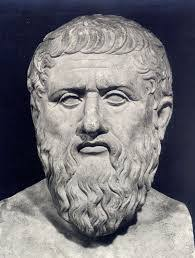 | 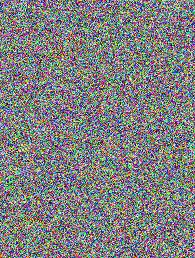 |

## Modular Arithmetic
- #### Euclidean Algorithm

In [8]:
import math
from random import randrange
import time

def extended_gcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        gcd, x, y = extended_gcd(b % a, a)
        return (gcd, y - (b // a) * x, x)

# Choose a security parameter, which will determine the size of our numbers.
sec_param = 128

# Choose a pair of integers of bitlength sec_param
a = randrange(2**(sec_param-1), 2**sec_param)
b = randrange(2**(sec_param-1), 2**sec_param)

# Euclidean algorithm
start_time = time.time()
print(math.gcd(a, b))
end_time = time.time()
print("Time taken for gcd:", end_time - start_time, "seconds")

# Extended euclidean algorithm. The three outputs correspond
# to gcd(a,b), and the two numbers x,y such that gcd(a,b)=ax+by.
start_time = time.time()
print(extended_gcd(a, b))
end_time = time.time()
print("Time taken for xgcd:", end_time - start_time, "seconds")


1
Time taken for gcd: 0.0 seconds
(1, -26255365085025758534990869795761600650, 33730450125916157432439546334195392987)
Time taken for xgcd: 0.0005276203155517578 seconds


# Hash Test of the SHA

In [11]:
pip install cryptography


Note: you may need to restart the kernel to use updated packages.


In [16]:
from cryptography.hazmat.primitives import hashes

# Example of using SHA-256 hash function
digest = hashes.Hash(hashes.SHA256())
digest.update(b'Hello, world!')
hashed_data = digest.finalize()
print(hashed_data)


b'1_[\xdbv\xd0x\xc4;\x8a\xc0\x06NJ\x01da+\x1f\xcew\xc8i4[\xfc\x94\xc7X\x94\xed\xd3'


## Groups 

- Let us consider some examples, and see whether they are groups or not.
1. **(Z≥0,+)**, where  Z≥0 is the set of non-negative elements of Z, and  + is integer addition. Integer addition is associative, and there is an identity element  0. However, there is no x∈Z≥0 such that 1+x=0,
and therefore (Z≥0,+)is not a group.

2. **(Z,+)** is a group of infinite order, since the operation is still associative, there is an identity element  0, and for any  x∈Z , there exists  y=−x∈Z such that x+y=y+x=0. For similar reasons, the pair  (Zn,+), for n∈N, is also a group, of order  n.

3. For  n∈N, the pair  **(Z∗n,⋅)**, where · is multiplication modulo  n, is a group of order φ(n). The operation is clearly associative, 1 is an identity element for multiplication, and every element  x∈Z∗n has an inverse  x−1∈Z∗n, by definition of  Z∗n.

**Obs** Z∗n is a multiplicative group




### Just a prove that Eulers theorem is good

In [6]:
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

def multiplicative_order(a, m):
    if gcd(a, m) != 1:
        return None
    else:
        order = 1
        power = a
        while power != 1:
            power = (power * a) % m
            order += 1
        return order

G = set()
m = 13
for x in range(1, m):
    if gcd(x, m) == 1:
        G.add(x)

for x in G:
    print(pow(x, multiplicative_order(x, m), m))


1
1
1
1
1
1
1
1
1
1
1
1


### Experimental results

> If we look at ($Z_{7}^{*}$, ·) where $Z_{7}^{*}$ = {1,2,3,4,5,6} 
We can check the order(3)

In [13]:
for x in [1, 2, 3, 4, 5, 6]:
    powers = [((x ** i) % 7) for i in range(1, 7)]
    print(f"Powers of {x} = {powers}")


Powers of 1 = [1, 1, 1, 1, 1, 1]
Powers of 2 = [2, 4, 1, 2, 4, 1]
Powers of 3 = [3, 2, 6, 4, 5, 1]
Powers of 4 = [4, 2, 1, 4, 2, 1]
Powers of 5 = [5, 4, 6, 2, 3, 1]
Powers of 6 = [6, 1, 6, 1, 6, 1]


> Has we can apreciatte, we obtain all the values of $Z_{7}^{*}$, therefore **3 is a generator**

> We can see that powers of **5 its also a generator** of G

*How we decide that 3^i is a generator?*
>We need to find some power that do not general a subgrup smaller of the group

> In the case of Z7 we need to check: 

> If i|6 then otder of 3^i is 6/i

Z* 23 = { 5,5^2, ... , 5 ^22 = 1mod 23}
> To find all subgroups of Z* 23   --> lagrange
> So possible orders are ord(H) C { 1,2,11,22 }
> 5 generator:
- H22 = Z23
- H11 = ? --> <5^2 mod 2 > = {5^2, 5^4, 5^6, ... , 5^22} --> we have eleven elements (volem fer 11 jumps i que en aquest 11 el resultat sigui 1
- H2 = <5^11> 
- H1 = <1>


In [21]:
def is_prime(n):
    """
    Check if a number is prime.

    Parameters:
    n (int): The number to check.

    Returns:
    bool: True if the number is prime, False otherwise.
    """
    if n <= 1:
        return False
    elif n <= 3:
        return True
    elif n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

# Example usage:
num = 701
if is_prime(num):
    print(num, "is a prime number.")
else:
    print(num, "is not a prime number.")


701 is a prime number.


In [23]:
a = 557 
b = 23
g = 19
print(g**a % 701)
print(g**b % 701)

636
361


<19> = {19, 361, 559,..., 636, 167, 367}

#### **Exercise** - Find all generators in $Z_{13}^{*}$. Find also all subgroups and their generators.

In [5]:
for x in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11 , 12]:
    powers = [((x ** i) % 13) for i in range(1, 13)]
    print(f"Powers of {x} = {powers}")

Powers of 2 = [2, 4, 8, 3, 6, 12, 11, 9, 5, 10, 7, 1]
Powers of 3 = [3, 9, 1, 3, 9, 1, 3, 9, 1, 3, 9, 1]
Powers of 4 = [4, 3, 12, 9, 10, 1, 4, 3, 12, 9, 10, 1]
Powers of 5 = [5, 12, 8, 1, 5, 12, 8, 1, 5, 12, 8, 1]
Powers of 6 = [6, 10, 8, 9, 2, 12, 7, 3, 5, 4, 11, 1]
Powers of 7 = [7, 10, 5, 9, 11, 12, 6, 3, 8, 4, 2, 1]
Powers of 8 = [8, 12, 5, 1, 8, 12, 5, 1, 8, 12, 5, 1]
Powers of 9 = [9, 3, 1, 9, 3, 1, 9, 3, 1, 9, 3, 1]
Powers of 10 = [10, 9, 12, 3, 4, 1, 10, 9, 12, 3, 4, 1]
Powers of 11 = [11, 4, 5, 3, 7, 12, 2, 9, 8, 10, 6, 1]
Powers of 12 = [12, 1, 12, 1, 12, 1, 12, 1, 12, 1, 12, 1]


In [22]:
for x in [1,5, 7, 11 ]:
    powers = [((x ** i) % 12) for i in range(1, 12)]
    print(f"Powers of {x} = {powers}")

Powers of 1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Powers of 5 = [5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5]
Powers of 7 = [7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7]
Powers of 11 = [11, 1, 11, 1, 11, 1, 11, 1, 11, 1, 11]


In [25]:
for i in range(1,23):
    print(5**i % 23)

5
2
10
4
20
8
17
16
11
9
22
18
21
13
19
3
15
6
7
12
14
1


In [26]:
for i in range(1,31):
    print(3**i % 31)

3
9
27
19
26
16
17
20
29
25
13
8
24
10
30
28
22
4
12
5
15
14
11
2
6
18
23
7
21
1


In [2]:
-10 % 13

3